# Descriptive statistics

In [26]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import statsmodels.api as sm
import statistics
import os 
from scipy.stats import norm

## Probability data, binomial distribution

We already got to know data that follow a binomial distribution, but we actually had not looked at the distribution. We will do this now. 10% of the 100 cells we count have deformed nuclei. To illustrate the distribution we will count repeatedly....  

In [27]:
n = 100 # number of trials
p = 0.1 # probability of each trial

s = np.random.binomial(n, p, 1000) #simulation repeating the experiment 1000 times
print(s)

[13  8 10  8  7  5 10 11 10 18  7 11 12  8 11  8  7 12 18  8  8 11  6 12
  9  9 12  7 13 11 10  6  9  9  6 14  8 17 12 10  9 12  9  7  5  8  6 11
  4 10 15  8 11 13 10  8  9 10 11 13 13  9 13  9 13 14  8 10 15 11  8 13
 10  8 10  6 10 10 13  3 13  9  8 12 11 12  9 14  9 11  7 14 10  8 11 11
  7  9 13 11  8  8 10 13  7  9 11 13 11 10  9  9  9  9 15  7 10 16  6  9
 16 10  8 15  8 13 17 13 14 11  9  8 11  9  7  8 10 13 11 11 10 13 13  7
  9 15  9 11  9  8 10 10  8  8 10 15 12 13  7 13 14  5 10 14 11 16  5 13
  7  7 10 10 10  9 11 11 11  9 14 13 11 12 14  6 13 13 13  7 10 17 12 13
 11  5  9 12 11 15 10  8 10 10  8  6 11 12  8 15 10 11  7  5 11 10  7 11
 14  8 10  4  8 13  7  7 12  5 13  7  9  8 17 11 11 12  7 11 10  8 11 11
 13 16 15 11 15 14  9  8  4 16 13 15  7  9 17 10 13  8  9  6  9 16 11 10
 12  7 12  9 11 11 11 13 11  6 14 16 10 14 16  9 15  8 10 13  2  8 11  6
  6  6  8 11 12  5  8 10  3 12 14 10  9 11  8 10 14  8 13 11  5 14 12 10
 16  9  3 12  5 10 12  6 11 12  7  8 10 15  9  9  8

As you can see, the result of the distribution is in absolute counts, not proportions - they can easyly be converted by deviding with n, but they dont have to...  

In [28]:
props = s/n
print(props)

[0.13 0.08 0.1  0.08 0.07 0.05 0.1  0.11 0.1  0.18 0.07 0.11 0.12 0.08
 0.11 0.08 0.07 0.12 0.18 0.08 0.08 0.11 0.06 0.12 0.09 0.09 0.12 0.07
 0.13 0.11 0.1  0.06 0.09 0.09 0.06 0.14 0.08 0.17 0.12 0.1  0.09 0.12
 0.09 0.07 0.05 0.08 0.06 0.11 0.04 0.1  0.15 0.08 0.11 0.13 0.1  0.08
 0.09 0.1  0.11 0.13 0.13 0.09 0.13 0.09 0.13 0.14 0.08 0.1  0.15 0.11
 0.08 0.13 0.1  0.08 0.1  0.06 0.1  0.1  0.13 0.03 0.13 0.09 0.08 0.12
 0.11 0.12 0.09 0.14 0.09 0.11 0.07 0.14 0.1  0.08 0.11 0.11 0.07 0.09
 0.13 0.11 0.08 0.08 0.1  0.13 0.07 0.09 0.11 0.13 0.11 0.1  0.09 0.09
 0.09 0.09 0.15 0.07 0.1  0.16 0.06 0.09 0.16 0.1  0.08 0.15 0.08 0.13
 0.17 0.13 0.14 0.11 0.09 0.08 0.11 0.09 0.07 0.08 0.1  0.13 0.11 0.11
 0.1  0.13 0.13 0.07 0.09 0.15 0.09 0.11 0.09 0.08 0.1  0.1  0.08 0.08
 0.1  0.15 0.12 0.13 0.07 0.13 0.14 0.05 0.1  0.14 0.11 0.16 0.05 0.13
 0.07 0.07 0.1  0.1  0.1  0.09 0.11 0.11 0.11 0.09 0.14 0.13 0.11 0.12
 0.14 0.06 0.13 0.13 0.13 0.07 0.1  0.17 0.12 0.13 0.11 0.05 0.09 0.12
 0.11 

Now we plot the distribution. The easiest first look is a histogram. 

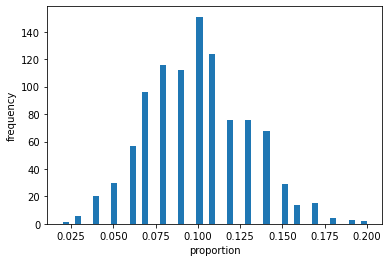

In [29]:
plt.hist(props, bins = 50)
plt.xlabel("proportion")
plt.ylabel("frequency")
plt.show()

The resolution is a bit inappropriate, given that we deal with integers. To increase the bin number would be a good idea. Maybe we should also plot a confidence interval.

(0.04120108046379837, 0.15879891953620165)


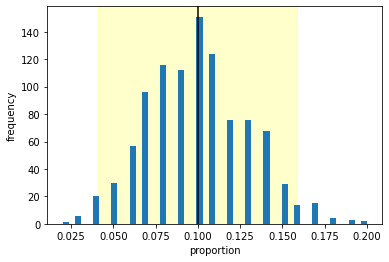

In [30]:
CI= sm.stats.proportion_confint(n*p, n, alpha=0.05)
print(CI)

plt.axvspan(CI[0],CI[1], alpha=0.2, color='yellow')
plt.hist(props, bins = 50)
plt.xlabel("proportion")
plt.ylabel("frequency")
plt.axvline(p, color="black")

In a binomial distribution, the distribution is given by the proportion and the sample size. Therefore we could calculate a confidence interval from one measurement.    

#### How can we now describe the distribution? 
Summary statistics:

In [31]:
print("the minimum is:",  min(props))
print("the maximum is:",  max(props))

the minimum is: 0.02
the maximum is: 0.2


In [32]:
print(statistics.mean(props))

0.10009


Is the mean a good way to look at our distribution? 

(0.0, 0.05880530708179099)
0.01956


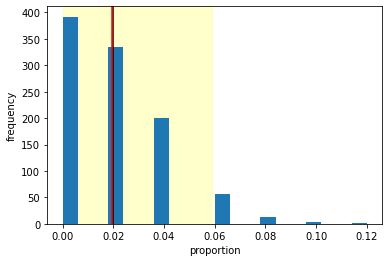

In [33]:
n = 50 # number of trials
p = 0.02 # probability of each trial

s = np.random.binomial(n, p, 1000) #simulation repeating the experiment 1000 times
props = s/n

CI= sm.stats.proportion_confint(n*p, n, alpha=0.05)
print(CI)

plt.axvspan(CI[0],CI[1], alpha=0.2, color='yellow')
plt.hist(props, bins = 20)
plt.xlabel("proportion")
plt.ylabel("frequency")
plt.axvline(p, color="black")
plt.axvline(statistics.mean(props), color="red")

print(statistics.mean(props))

(0.007728684431927856, 0.03227131556807215)
0.019786


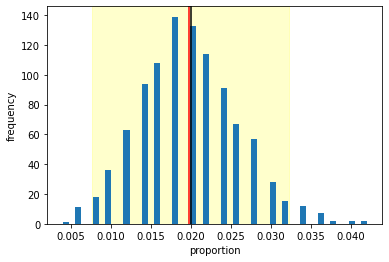

In [34]:
n = 500 # number of trials
p = 0.02 # probability of each trial

s = np.random.binomial(n, p, 1000) #simulation repeating the experiment 1000 times
props = s/n

CI= sm.stats.proportion_confint(n*p, n, alpha=0.05)
print(CI)

plt.axvspan(CI[0],CI[1], alpha=0.2, color='yellow')
plt.hist(props, bins = 50)
plt.xlabel("proportion")
plt.ylabel("frequency")
plt.axvline(p, color="black")
plt.axvline(statistics.mean(props), color="red")

print(statistics.mean(props))

## Count data/ the Poisson distribution

The Poisson distribution is built on count data, e.g. the numbers of raisins in a Dresdner Christstollen, the number of geese at any given day between Blaues Wunder and Waldschlösschenbrücke, or radioactive decay. So lets use a Geiger counter and count the numbers of decay per min.  

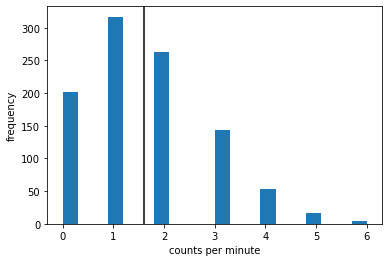

In [35]:
freq =1.6
s = np.random.poisson(freq, 1000)

plt.hist(s, bins = 20)
plt.xlabel("counts per minute")
plt.ylabel("frequency")
plt.axvline(freq, color="black")

### Confidence intervals for a Poisson distribution

Similar to the binomial distribution, the distribution is defined by sample size and the mean.  
Also for Poisson, one can calculate an also asymmetrical confidence interval:

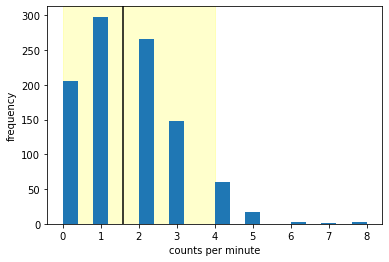

In [36]:
freq =1.6
s = np.random.poisson(freq, 1000)
CI = st.poisson.interval(0.95,freq)

plt.axvspan(CI[0],CI[1], alpha=0.2, color='yellow')
plt.hist(s, bins = 20)
plt.xlabel("counts per minute")
plt.ylabel("frequency")
plt.axvline(freq, color="black")


For a poisson distribution, poisson error can be reduced, when increasing the counting population, in our case lets count for 10 min instead of 1 min, and see what happens.   

[0.9 2.4]


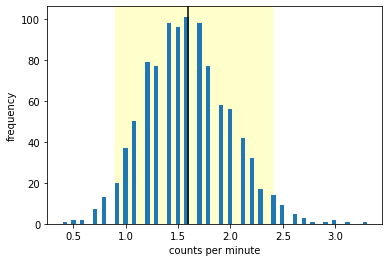

In [37]:
CI = np.true_divide(st.poisson.interval(0.95,freq*10),10)
print(CI)
s = np.true_divide(np.random.poisson(freq*10, 1000),10)

plt.axvspan(CI[0],CI[1], alpha=0.2, color='yellow')
plt.hist(s, bins = 70)
plt.xlabel("counts per minute")
plt.ylabel("frequency")
plt.axvline(freq, color="black")

What is the difference between Poisson and Binomial? Aren't they both kind of looking at count data?   
Yes, BUT:   
Binomial counts events versus another event, e.g. for the cells there are two options, normal versus deformed. A binomial distribution is about comparing the two options.   
Poisson counts with an open end, e.g. number of mutations.  

## Continuous data

Let's import the count data you have generated with Robert. When you download it from Google sheets (https://docs.google.com/spreadsheets/d/1Ek-23Soro5XZ3y1kJHpvaTaa1f4n2C7G3WX0qddD-78/edit#gid=0), it comes with spaces. Try to avoid spaces and special characters in file names, they tend to make trouble.   
I renamed it to 'BBBC001.csv'.

In [38]:
dat = pd.read_csv('https://raw.githubusercontent.com/BiAPoL/Bio-image_Analysis_with_Python/main/biostatistics/data/BBBC001.csv', header=1, sep=';')

print(dat)

   Annotator name (pseudonym is ok)  BBBC001 manual count  \
0                            Robert                   370   
1                          Lenka B.                   365   
2                          Jozef F.                   390   
3                         Lukas M..                   370   
4                          Luisa W.                   383   
..                              ...                   ...   
83                         Lucas V.                   356   
84                          Lara L.                   368   
85                         Laura M.                   367   
86                           Julia                    367   
87                            Marie                   367   

    BBBC001 CLIJ Voronoi Otsu Labeling  BBBC001 StarDist  BBBC001 Find Maxima  
0                                367.0             379.0                  NaN  
1                                360.0             373.0                375.0  
2                          

For now we will focus on the manual counts, visualise it and perform summary statistics.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  3.,  0.,  3.,
         8., 15.,  6.,  7., 12., 13.,  9.,  6.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 52.  ,  56.01,  60.02,  64.03,  68.04,  72.05,  76.06,  80.07,
         84.08,  88.09,  92.1 ,  96.11, 100.12, 104.13, 108.14, 112.15,
        116.16, 120.17, 124.18, 128.19, 132.2 , 136.21, 140.22, 144.23,
        148.24, 152.25, 156.26, 160.27, 164.28, 168.29, 172.3 , 176.31,
        180.32, 184.33, 188.34, 192.35, 196.36, 200.37, 204.38, 208.39,
        212.4 , 216.41, 220.42, 224.43, 228.44, 232.45, 236.46, 240.47,
  

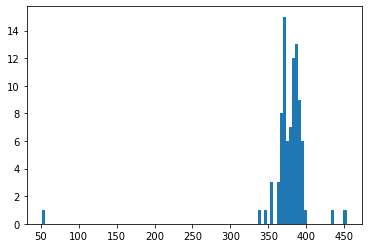

In [58]:
man_count = dat["BBBC001 manual count"].values
auto_count = dat.iloc[:,[2,3,4]].values

plt.hist(man_count,bins=100)

In [73]:
print(man_count)

[370 365 390 370 383 382 383 381 371 380 396 371 377 387 394 392 368 370
 391 389 385 370 368 391 388 370 365 389 390 393 394 355 387 388 398 379
 393 364 376 383 370 376 385 382 453 382 433 373 386 362 386 387 381 370
 377 387 371 382 381 388 372 392 384 376 395 340 374 371 377 355 387 384
 363  52 373 385 372 372 380 389 348 369 380 356 368 367 367 367]


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 21.,  0.,
          3.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  2.,  0.,  1.,  9.,  1.,  1.,  0.,  0.

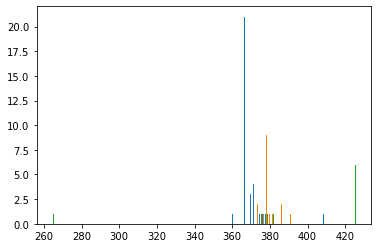

In [63]:
plt.hist(auto_count,bins=100)

<AxesSubplot:ylabel='Density'>

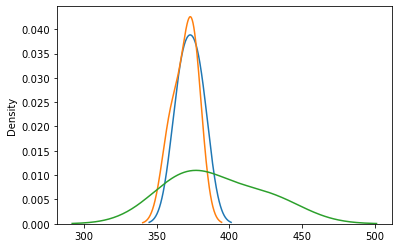

<AxesSubplot:ylabel='Density'>

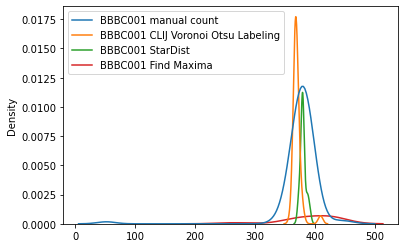

In [74]:
sns.kdeplot(data=dat)

There are different alternatives of displaying such data, some of which independent of distribution. You will find documentation in the graph galery: https://www.python-graph-gallery.com/

<AxesSubplot:ylabel='Density'>

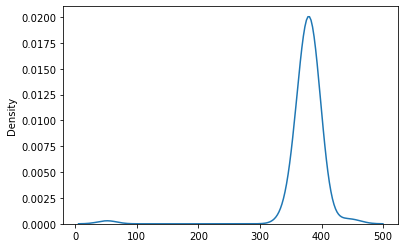

In [60]:
sns.kdeplot(man_count)

A density plot is sometimes helpful to see the distribution, but be aware of the smoothing and that you loose the information on sample size. 

<AxesSubplot:>

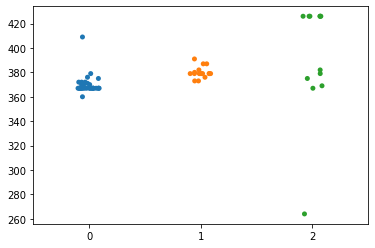

In [72]:
sns.stripplot(data=auto_count)

<AxesSubplot:>

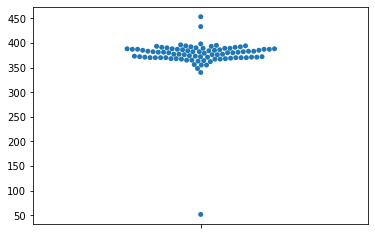

In [17]:
sns.swarmplot(y=man_count)

<AxesSubplot:>

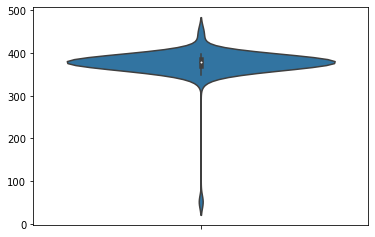

In [18]:
sns.violinplot(y=man_count)

this plot is useful, but the density function can sometimes be misleading and lead to artefacts dependent on the sample size. Unless explicitely stated, sample sizes are usually normalised and therefore hidden!

<AxesSubplot:>

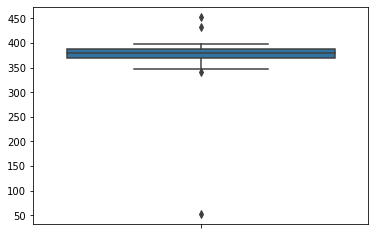

In [56]:
sns.boxplot(y=man_count)

Be aware that boxplots hide the underlying distribution and the sample size.  
So the "safest" plot, when in doubt, is to combine boxplot and jitter:

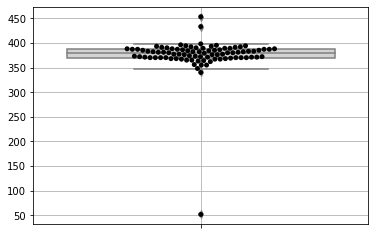

In [20]:
ax = sns.swarmplot(y=man_count, color="black")
ax = sns.boxplot(y=man_count,color="lightgrey")
ax.grid()

The boxplot is very useful, because it directly provides non-parametric summary statistics:  
Min, Max, Median, Quartiles and therefore the inter-quartile range (IQR). The whiskers are usually the highest point that is within 1.5x the quartile plus the IQR. Everything beyond that is considered an outlier. Whiskers are however not always used in this way! 
The mean and standard diviation are not visible in a boxplot, because it is only meaningful in distributions that center around the mean. It is however a part of summary statistics:

In [21]:
dat["BBBC001 manual count"].describe()

count     88.000000
mean     375.715909
std       37.985463
min       52.000000
25%      370.000000
50%      380.000000
75%      387.000000
max      453.000000
Name: BBBC001 manual count, dtype: float64

## Normal distribution

We assume that our distribution is "normal".  
First we fit a normal distribution to our data. 

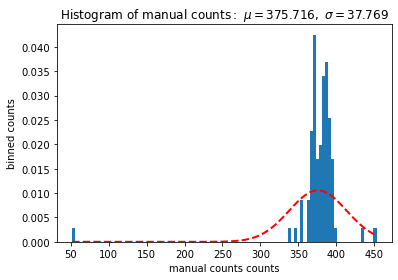

In [22]:
(mu, sigma) = norm.fit(man_count)
n, bins, patches = plt.hist(man_count, 100,density=1)


# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('manual counts counts')
plt.ylabel('binned counts')
plt.title(r'$\mathrm{Histogram\ of\ manual\ counts:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()

Is it really normally distributed? What we see here is already one of the most problematic properties of a normal distribution: The susceptibility to outliers. 

In normal distributions the confidence interval is determined by the standard diviation. A confidence level of 95% equals 1.96 x sigma.  

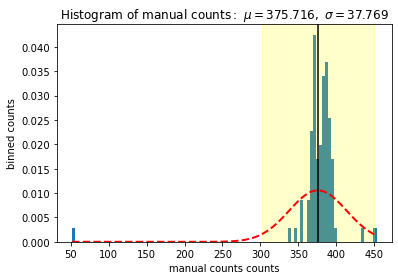

In [23]:
#plot

(mu, sigma) = norm.fit(man_count)
n, bins, patches = plt.hist(man_count, 100,density=1)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)


plt.xlabel('manual counts counts')
plt.ylabel('binned counts')
plt.title(r'$\mathrm{Histogram\ of\ manual\ counts:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.axvspan((mu-1.96*sigma),(mu+1.96*sigma), alpha=0.2, color='yellow')
plt.axvline(mu, color="black")


plt.show()

This shows even nicer that our outlier messes up the distribution :-)  
How can we solve this in practise?  
1. Ignore the problem and continue with the knowledge that we are overestimating the width of the distribution and underestimating the mean.  
2. Censor the outlier. 
3. Decide that we cannot assume normality and move to either a different distribution or non-parametric statistics. 

## Other distributions   
Of course there are many more distributions, e.g.  
Lognormal is a distribution that becomes normal, when log transformed. It is important for the "geometric mean".  
Bimodal distributions may arise from imaging data with background signal, or DNA methylation data.   
Negative binomial distributions are very important in genomics, especially RNA-Seq analysis. 

## Exercise

1. We had imported the total table with also the automated counts. Visualise the distribution of the data next to each other
2. Generate the summary statistics and compare the different distributions
3. Two weeks ago you learned how to analyze a folder of images and measured the average size of beads:
https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/image_processing/12_process_folders.ipynb

Go back to the bead-analysis two weeks ago and measure the intensity of the individual beads (do not average over the image). Plot the beads' intensities as different plots. Which one do you find most approproiate for these data?

